
# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [3]:
adult = pd.read_csv(r'C:\Users\happi\OneDrive\Desktop\adult.csv')

## Exploraory Data Analysis

In [4]:
#PART 1: DATA STRUCTURE

In [5]:
#Checking the first 5 rows of the data
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
#Checking the last 5 rows of the data
adult.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
#Checking the dimensions of the data
adult.shape

(32561, 15)

In [8]:
#Checking the columns of the data
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [9]:
#Checking the data type of the columns
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [10]:
#Getting the statistical properties of the data
adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
#PART 2: OVERVIEW OF THE DATA

In [12]:
#Check for duplicate rows
adult.duplicated().sum()

24

In [13]:
#Drop duplicate rows
adult.drop_duplicates(inplace = True)

In [14]:
#View new shape of the data
adult.shape

(32537, 15)

In [15]:
#Check the count of the income column(y variable)
adult['income'].value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

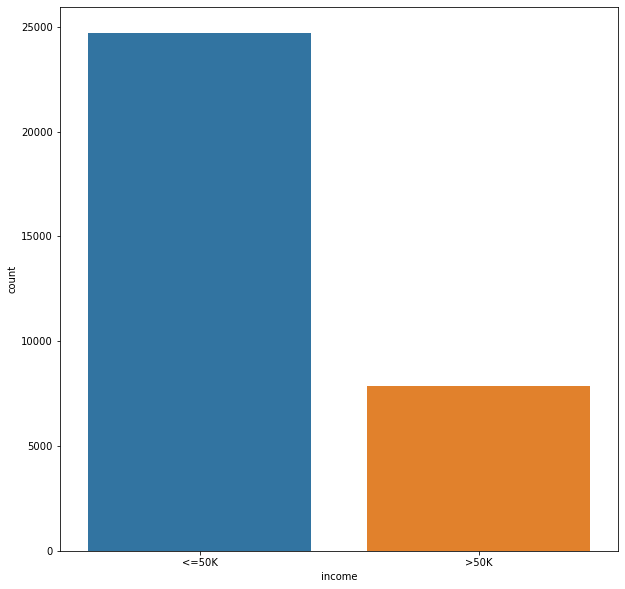

In [16]:
#Representing this graphically:
plt.figure(figsize = (10,10))
sns.countplot(x = 'income', data = adult)

In [17]:
#Checking for number of unique values in categorical features
for col in adult.columns:
    if adult[col].dtype == 'object':
        unique = len(adult[col].unique())
        print("{col}: {unique} unique values".format(col = col, unique = unique))

workclass: 9 unique values
education: 16 unique values
marital.status: 7 unique values
occupation: 15 unique values
relationship: 6 unique values
race: 5 unique values
sex: 2 unique values
native.country: 42 unique values
income: 2 unique values


In [18]:
#Native.country has the highest number of unique values. View it's unique values
adult['native.country'].value_counts()

United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [19]:
#Define a funcion to replace every other country apart from United-States with 'Other'
def replace_country(x):
    if x == 'United-States':
        return 'United-States'
    else:
        return 'Other'

In [20]:
adult['native.country'] = adult['native.country'].apply(replace_country)

In [21]:
adult['native.country'].value_counts()

United-States    29153
Other             3384
Name: native.country, dtype: int64

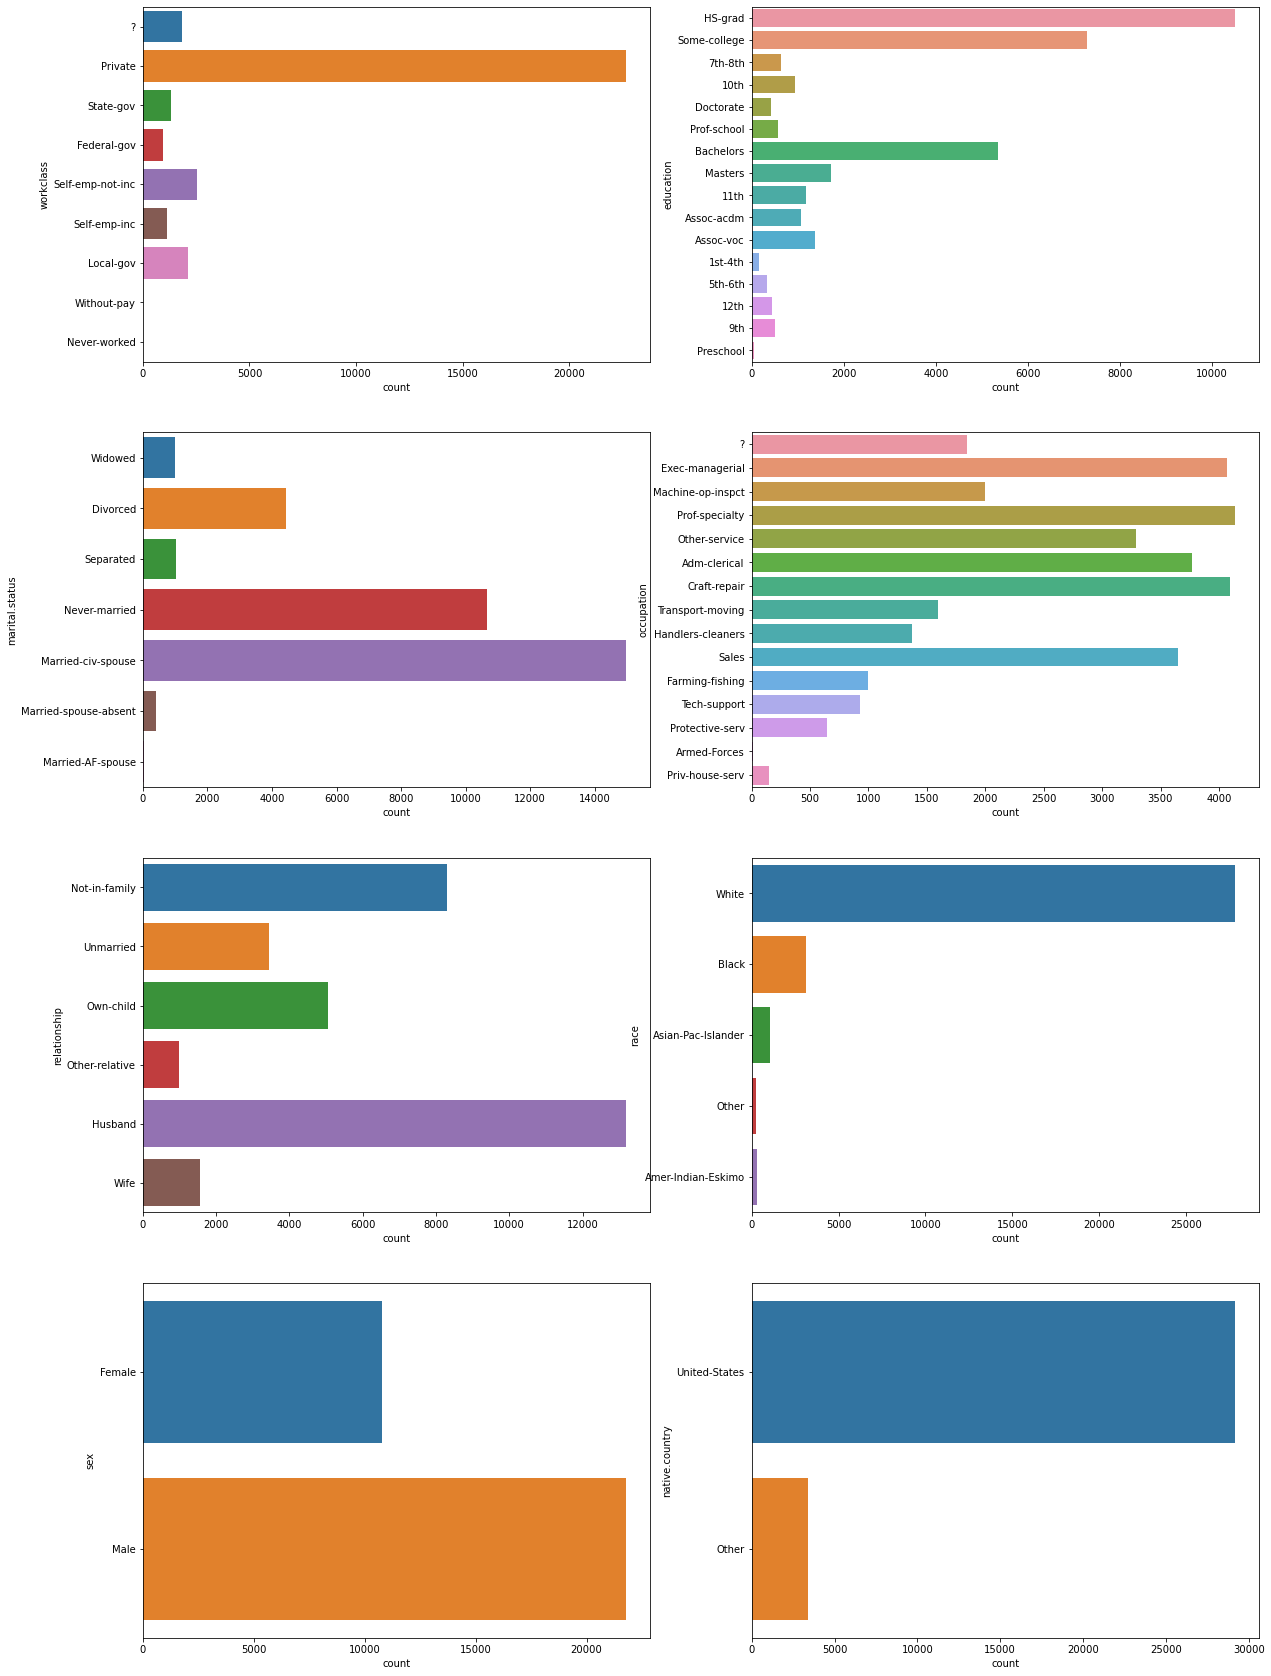

In [22]:
#Plotting a count of categorical values
cat = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
plt.figure(figsize = (20, 30))
plotnumber = 1
for i in cat:
    plt.subplot(4,2,plotnumber)
    plt.xlabel(i)
    sns.countplot(y = i, data = adult)
    plotnumber+=1
plt.show()

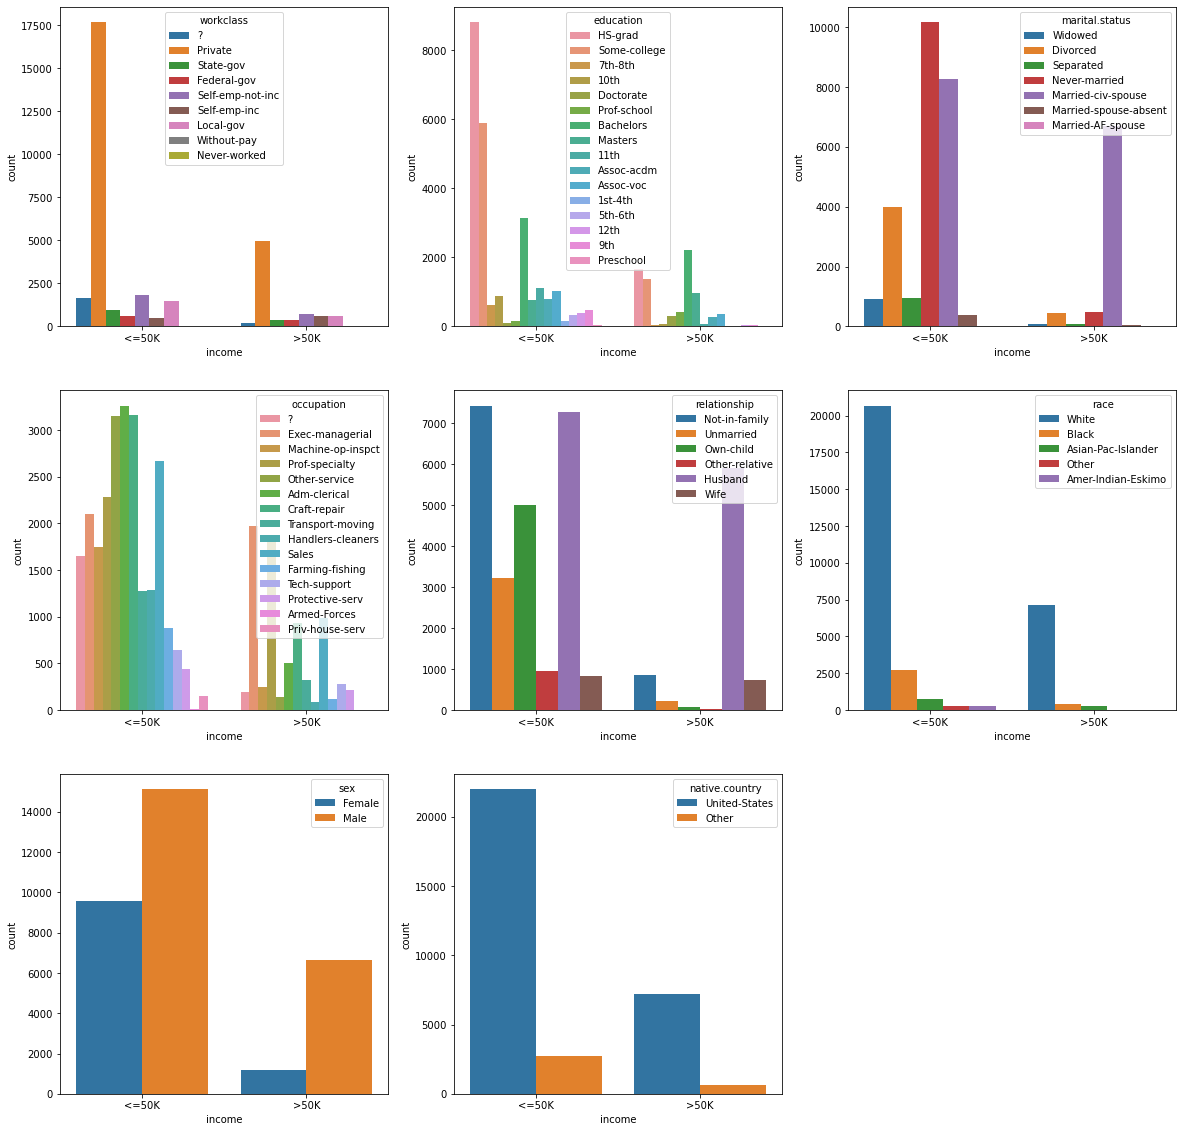

In [23]:
#Group categorical features by the output variable
cat = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
plt.figure(figsize = (20,20))
plotnumber = 1
for i in cat:
    plt.subplot(3,3,plotnumber)
    plt.xlabel(i)
    sns.countplot(x = 'income', hue = i, data = adult)
    plotnumber+=1
plt.show()

In [24]:
#Group numerical features by the output variable
adult.groupby('income').mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
income,,,,,,
<=50K,36.787392,190345.926796,9.596081,148.884970,53.190258,38.842862
>50K,44.250925,188000.480674,11.612195,4007.164562,195.051282,45.473402


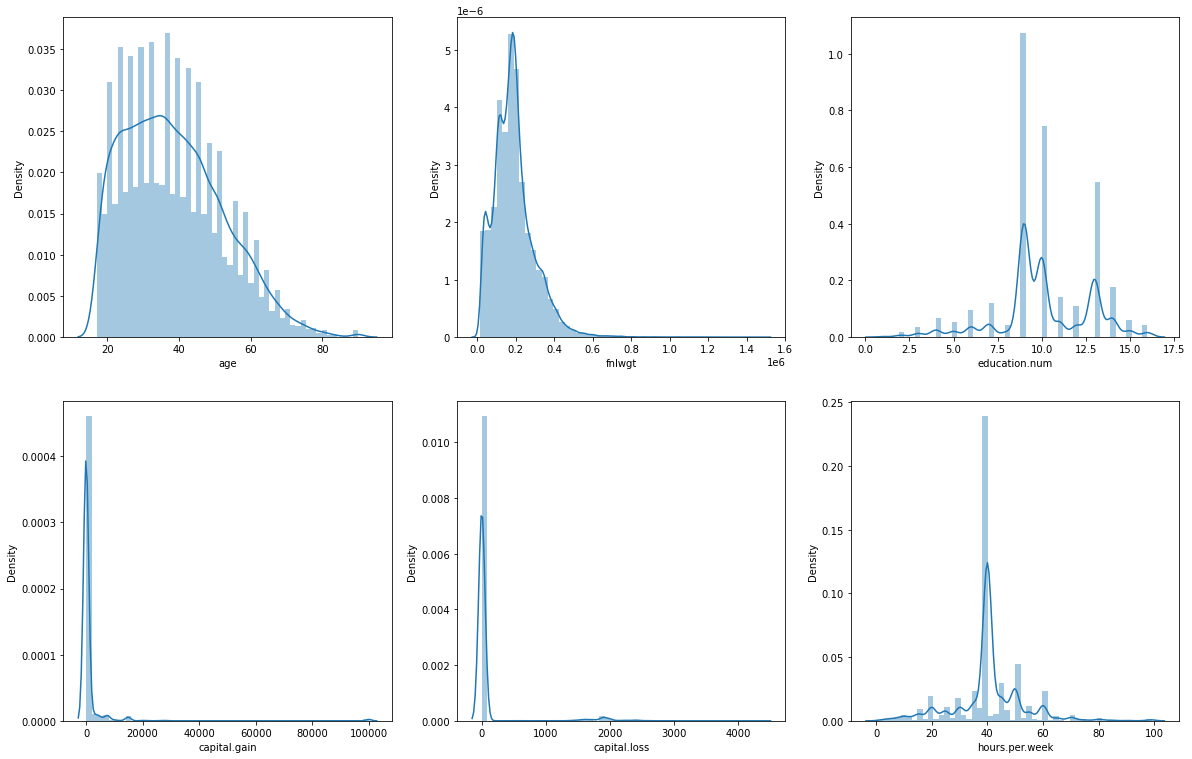

In [25]:
#Plotting a distribution of numerical values
numerical = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
plt.figure(figsize = (20, 20))
plotnumber =1
for i in numerical:
    plt.subplot(3,3,plotnumber)
    plt.xlabel(i)
    sns.distplot(adult[i])
    plotnumber+=1
plt.show()

In [26]:
#PART 3: DEALING WITH OULIERS

In [27]:
#First we make a copy of the data
adult2 = adult.copy()

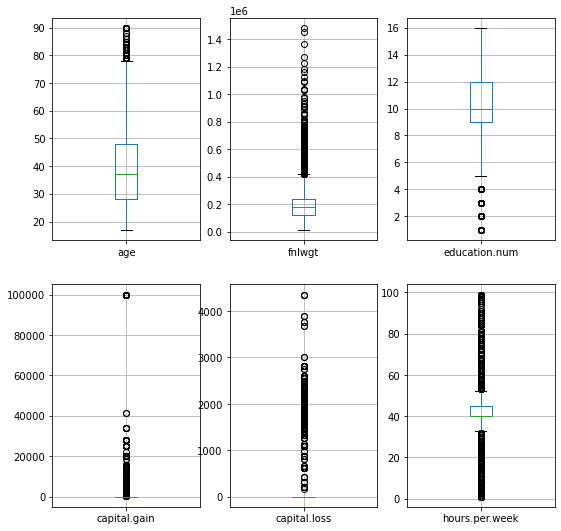

In [28]:
#Drawing a boxplot of numerical vcolumns to visualise outliers
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (9, 9))
adult2.boxplot(column = "age", ax = axes[0, 0]);
adult2.boxplot(column = "fnlwgt", ax = axes[0, 1]);
adult2.boxplot(column = "education.num", ax = axes[0, 2]);
adult2.boxplot(column = "capital.gain", ax = axes[1, 0]);
adult2.boxplot(column = "capital.loss", ax = axes[1, 1]);
adult2.boxplot(column = "hours.per.week", ax = axes[1, 2]);


In [29]:
#Seperating numerical columns
df_num = adult2.select_dtypes(include = [np.number])
df_num.columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [30]:
#Removal of ouliers using zscore
from scipy import stats
z_score = np.abs(stats.zscore(df_num))

In [31]:
#Keep only data with zscore less than 3
adult2 = adult2[(z_score < 3).all(axis = 1)]

In [32]:
#PART 4: TAKING A CLOSER LOOK AT THE DATA

In [33]:
# Define a Function to change the income column from categorical to numerical
def replace_income(val):
    if val == '<=50K':
        return 0
    else:
        return 1

In [34]:
adult2['income'] = adult2['income'].apply(replace_income)

In [35]:
#Replace '?' with NaN
adult2.replace({"?": np.nan}, inplace = True)

In [36]:
#Feature Selection
#Since education.num is a numerical representation of the education column, both are not needed
#The education colmn will be dropped

In [37]:
adult2 = adult2.drop(['education'], axis = 1)

In [38]:
#We split the data into target and feature variables

In [39]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(adult2, test_size = 0.2, random_state = 42)

In [40]:
#Make a copy of the train set
data = train_set.copy()

In [41]:
#Checking for correlation between outcome variable and other numeric variables
data.corr()['income'].sort_values(ascending = False)

income            1.000000
capital.gain      0.342548
education.num     0.319973
age               0.243754
hours.per.week    0.226457
fnlwgt           -0.012114
capital.loss     -0.016626
Name: income, dtype: float64

<AxesSubplot:>

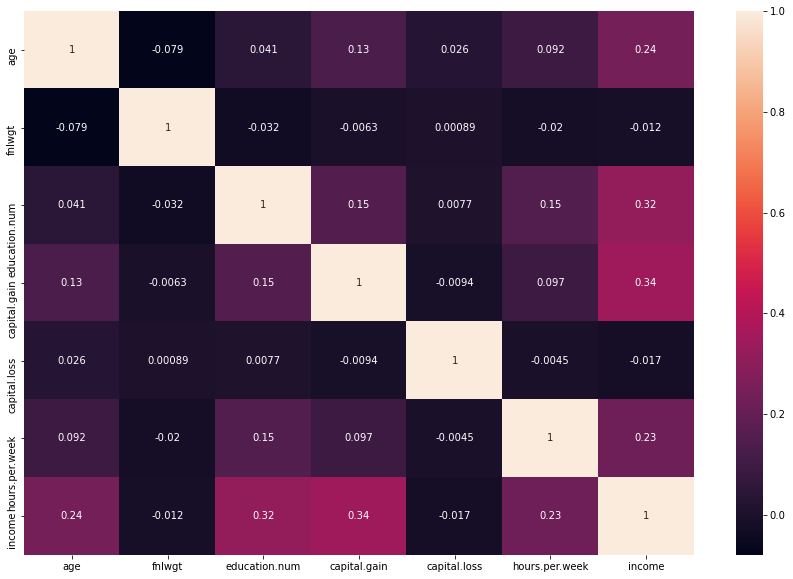

In [42]:
#Showing correlation in a heat map
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True)

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='fnlwgt', ylabel='age'>,
        <AxesSubplot:xlabel='education.num', ylabel='age'>,
        <AxesSubplot:xlabel='capital.gain', ylabel='age'>,
        <AxesSubplot:xlabel='capital.loss', ylabel='age'>,
        <AxesSubplot:xlabel='hours.per.week', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='fnlwgt'>,
        <AxesSubplot:xlabel='fnlwgt', ylabel='fnlwgt'>,
        <AxesSubplot:xlabel='education.num', ylabel='fnlwgt'>,
        <AxesSubplot:xlabel='capital.gain', ylabel='fnlwgt'>,
        <AxesSubplot:xlabel='capital.loss', ylabel='fnlwgt'>,
        <AxesSubplot:xlabel='hours.per.week', ylabel='fnlwgt'>],
       [<AxesSubplot:xlabel='age', ylabel='education.num'>,
        <AxesSubplot:xlabel='fnlwgt', ylabel='education.num'>,
        <AxesSubplot:xlabel='education.num', ylabel='education.num'>,
        <AxesSubplot:xlabel='capital.gain', ylabel='education.num'>,
        <AxesSubplot:xlabel='capit

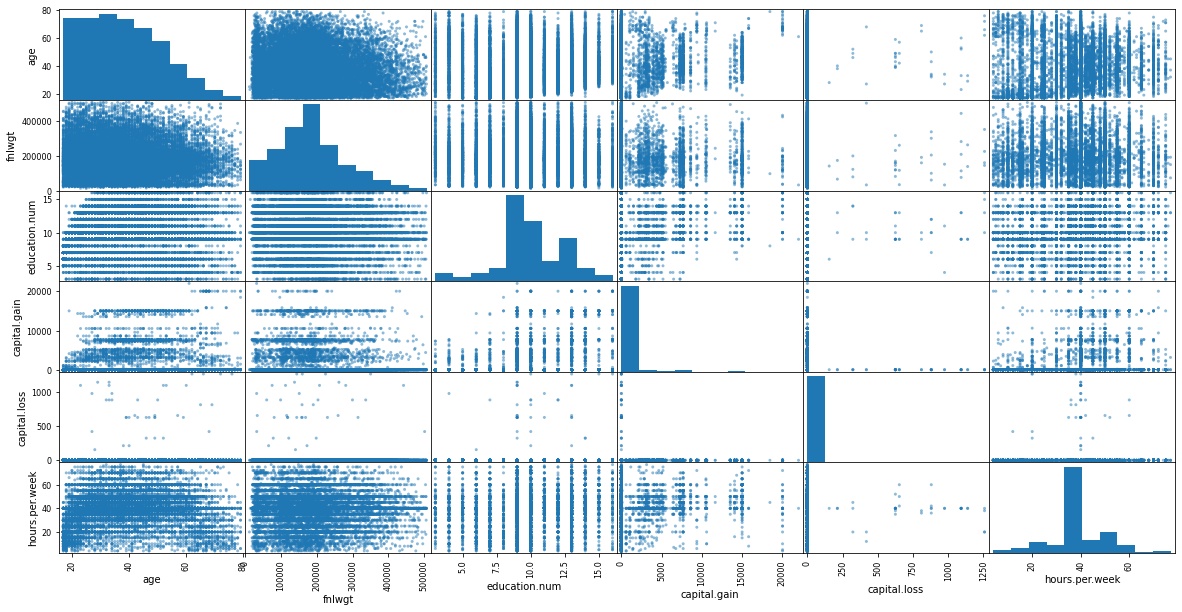

In [43]:
#Plotting a scatter matrix of correlation between numerical values
from pandas.plotting import scatter_matrix
numerical = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
scatter_matrix(data[numerical], figsize=(20, 10))

## Data Pre-processing

In [44]:
#This will be done in 3 steps: replacing missing values, feature scaling and categorical attributes encoding.
#But first the test set is split into target and feature variables

In [45]:
X_train = data.drop(['income'], axis = 1)
Y_train = data.income

In [46]:
#A pipeline is created to handle the prepocessing steps

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [48]:
#The missing values are all in the categorical column. First create a pipeline to replace them with the most frequent 
#and then encode the categorical values
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')),
    ('encoder', OneHotEncoder()),
])

In [49]:
#Add the already created categorical pipeline to a pipeline to scale numerical data 
data_cat = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
data_num = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
pipeline = ColumnTransformer([
    ('cat', cat_pipeline, data_cat),
    ('num', StandardScaler(), data_num),
])

In [50]:
prepared_data = pipeline.fit_transform(X_train)

## Selecting and Training Models

In [51]:
#1. LOGISTIC REGRESSION

In [52]:
#import the linear regression model
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [53]:
#Fit the model to our train set
lg.fit(prepared_data, Y_train)

LogisticRegression()

In [54]:
#Predicting values from the train set

In [55]:
sampleX = X_train.iloc[:15]
sampleY = Y_train.iloc[:15]

In [56]:
sampleX_prepared = pipeline.transform(sampleX)

In [57]:
#Compare predicted values to actual values

In [58]:
print('Predicted Samples: ', lg.predict(sampleX_prepared))
print('Actual Samples: ', list(sampleY))

Predicted Samples:  [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
Actual Samples:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [59]:
#Check for training accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [60]:
Y_train_pred = lg.predict(prepared_data)

In [61]:
accuracy_score(Y_train, Y_train_pred)

0.852643938440894

In [62]:
cf_matrix = confusion_matrix(Y_train, Y_train_pred)
cf_matrix

array([[17256,  1205],
       [ 2309,  3077]], dtype=int64)

<AxesSubplot:>

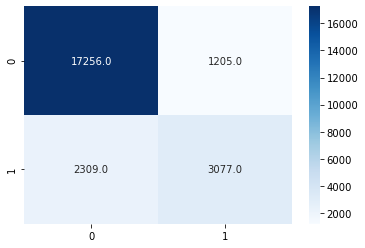

In [63]:
#Plot a heatmap of the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt = '.1f', cmap = 'Blues')

In [64]:
#2. RANDOM FOREST CLASSIFIER

In [65]:
#import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [66]:
#Fit the model to our data
rf.fit(prepared_data, Y_train)
Y_train_pred = rf.predict(prepared_data)

In [67]:
accuracy_score(Y_train, Y_train_pred)

0.9999580660041095

In [68]:
cf_matrix = confusion_matrix(Y_train, Y_train_pred)
cf_matrix

array([[18461,     0],
       [    1,  5385]], dtype=int64)

<AxesSubplot:>

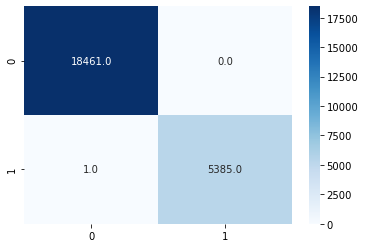

In [69]:
#Plot a heatmap of the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt = '.1f', cmap = 'Blues')

In [70]:
#The Random Forest Classifier is badly over-fitting the data, we use K-fold cross-validation to obtain a better evaluation

In [71]:
#Improve the evaluation using cross-validation
from sklearn.model_selection import cross_val_score

In [78]:
scores = cross_val_score(rf, prepared_data, Y_train, cv =10, scoring = 'accuracy')
scores

array([0.85744235, 0.86666667, 0.8524109 , 0.84025157, 0.84612159,
       0.84821803, 0.84402516, 0.8477349 , 0.85528523, 0.8557047 ])

In [79]:
#Find the mean of the scores
scores.mean()

0.8513861100558578

In [80]:
#Repeat the cross-validation process for the Logistic Regression Model

In [81]:
scores = cross_val_score(lg, prepared_data, Y_train, cv =10, scoring = 'accuracy')
scores

array([0.85492662, 0.86163522, 0.85366876, 0.84486373, 0.84989518,
       0.84234801, 0.85157233, 0.83682886, 0.85864094, 0.8670302 ])

In [82]:
#Find the mean
scores.mean()

0.8521409853249476

In [83]:
#3. SUPPORT VECTOR MACHINE

In [84]:
#Import the Support Vector model
from sklearn.svm import SVC
svm = SVC()

In [85]:
#Fit the model to our train set
svm.fit(prepared_data, Y_train)
Y_train_pred = svm.predict(prepared_data)

In [86]:
accuracy_score(Y_train, Y_train_pred)

0.8638822493395396

In [87]:
cf_matrix = confusion_matrix(Y_train, Y_train_pred)
cf_matrix

array([[17567,   894],
       [ 2352,  3034]], dtype=int64)

<AxesSubplot:>

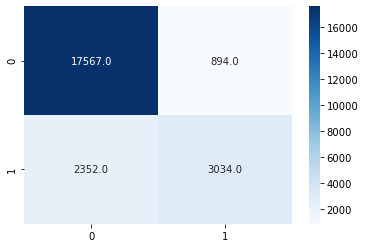

In [88]:
#Plot a heatmap of the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt = '.1f', cmap = 'Blues')

In [89]:
#Using cross-validation

In [91]:
scores = cross_val_score(svm, prepared_data, Y_train, cv =10, scoring = 'accuracy').mean()
scores

0.8585150479084884

## Fine Tune The Models

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
#For Logistic Regression 

In [94]:
#Stating the parameters
param_grid = [
                {'penalty': ['l1', 'l2', 'none'], 'C': np.logspace(-4, 4),
                 'solver': ['lbfgs','newon-cg', 'liblinear'],
                'max_iter': [100, 1000, 2500],}
    ]
grid_search = GridSearchCV(lg, param_grid, scoring = 'accuracy',
                          return_train_score = True, cv = 10, n_jobs = -1)

In [95]:
#Fitting them to our train set
grid_search.fit(prepared_data, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e...
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500],
                          'penalty': ['l1', 'l2', 'none'],
                          'solver': ['lbfgs', 'newon-cg', 'liblinear']}],
             return_train_score=True, scoring='accuracy')

In [96]:
#Finding the best parameters
lg_best_param = grid_search.best_params_
lg_best_param

{'C': 0.05963623316594643,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [97]:
#Getting the best estimator
lg_grid = grid_search.best_estimator_
lg_grid

LogisticRegression(C=0.05963623316594643, solver='liblinear')

In [98]:
#Finding the best score
grid_search.best_score_

0.8528958254189355

In [99]:
#For Random Forest

In [100]:
#Stating the parameters
param_grid = [
                {'n_estimators': [10, 30, 50], 'max_features': ['auto'], 'max_depth': [100,1000],},
                {'n_estimators': [10, 100, 1000], 'max_features': [2,4,6,8],  }
    ]
grid_search = GridSearchCV(rf, param_grid, scoring = 'accuracy',
                          return_train_score = True, cv = 10, n_jobs = -1)

In [101]:
#Fitting them to our train set
grid_search.fit(prepared_data, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [100, 1000], 'max_features': ['auto'],
                          'n_estimators': [10, 30, 50]},
                         {'max_features': [2, 4, 6, 8],
                          'n_estimators': [10, 100, 1000]}],
             return_train_score=True, scoring='accuracy')

In [102]:
#Finding the best parameters
rf_best_params = grid_search.best_params_
rf_best_params

{'max_features': 8, 'n_estimators': 100}

In [103]:
#Getting the best estimator
rf_grid = grid_search.best_estimator_
rf_grid

RandomForestClassifier(max_features=8)

In [104]:
#Finding the best score
grid_search.best_score_

0.8519730769771924

In [105]:
#Feature Importance

In [106]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([5.84412086e-03, 5.85535081e-03, 1.32899003e-06, 1.06124898e-02,
       5.94462907e-03, 8.61732571e-03, 4.86876563e-03, 7.13926557e-05,
       4.53985162e-03, 3.20481727e-04, 8.07316417e-02, 8.47649281e-04,
       1.85356075e-02, 1.34069443e-03, 1.46465712e-03, 5.64501875e-03,
       2.95788922e-05, 8.47316456e-03, 1.90353178e-02, 4.22508198e-03,
       3.79324686e-03, 4.57650058e-03, 7.06061562e-03, 1.04062951e-04,
       1.58067907e-02, 3.35617270e-03, 7.46295061e-03, 5.03631740e-03,
       4.96465314e-03, 4.83339044e-02, 8.35849987e-03, 1.37618372e-03,
       5.56494125e-03, 4.46830230e-03, 9.98864755e-03, 1.39490820e-03,
       3.51527170e-03, 5.45026253e-03, 9.97131578e-04, 7.04396220e-03,
       6.67490843e-03, 6.86487874e-03, 5.61920031e-03, 5.76461369e-03,
       1.56025567e-01, 1.78894529e-01, 1.12721712e-01, 1.07313264e-01,
       3.05412867e-04, 8.41584384e-02])

In [107]:
cat_attribs = pipeline.named_transformers_['cat'].named_steps['encoder'].categories_

In [108]:
attributes = data_num + cat_attribs
list(zip(feature_importance, attributes))

[(0.005844120859685003, 'age'),
 (0.005855350806126932, 'fnlwgt'),
 (1.3289900325285635e-06, 'education.num'),
 (0.010612489768379887, 'capital.gain'),
 (0.005944629072547264, 'capital.loss'),
 (0.008617325706940834, 'hours.per.week'),
 (0.004868765633942015,
  array(['Federal-gov', 'Local-gov', 'Never-worked', 'Private',
         'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
        dtype=object)),
 (7.139265565051402e-05,
  array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
         'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
        dtype=object)),
 (0.004539851621441259,
  array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
         'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
         'Other-service', 'Priv-house-serv', 'Prof-specialty',
         'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'],
        dtype=object)),
 (0.00032048172722040717,
  array(['Husband', 'Not-in-fami

In [106]:
#For SVM

In [107]:
#Stating the parameters
param_grid = [
                {'kernel': ['linear', 'poly', 'rbf'], 'C': [1, 5, 10], 'degree': [3, 8],},
                {'coef0': [ 0.01, 0.5, 10], 'gamma': ['auto', 'scale'],  }
    ]
grid_search = GridSearchCV(svm, param_grid, scoring = 'accuracy',
                          return_train_score = True, cv = 10, n_jobs = -1)

In [108]:
grid_search.fit(prepared_data, Y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 5, 10], 'degree': [3, 8],
                          'kernel': ['linear', 'poly', 'rbf']},
                         {'coef0': [0.01, 0.5, 10],
                          'gamma': ['auto', 'scale']}],
             return_train_score=True, scoring='accuracy')

In [109]:
#Checking for the best parameters
best_param = grid_search.best_params_
best_param

{'C': 1, 'degree': 3, 'kernel': 'rbf'}

In [110]:
#Getting the best estimator
svm_grid = grid_search.best_estimator_
svm_grid

SVC(C=1)

In [111]:
grid_search.best_score_

0.8585150479084884

In [112]:
#A new pipeline will be built using the best 5 features gotten. 
#Also grid search cv will be run again based on the best parameters
#The scores will then be compared

In [113]:
#Building the pipeline using the best features
new_data_cat = ['workclass']
new_data_num = ['age', 'fnlwgt', 'capital.gain', 'capital.loss']
new_pipeline = ColumnTransformer([
    ('cat', cat_pipeline, data_cat),
    ('num', StandardScaler(), data_num),
])

In [114]:
#Pass the train set through the pipeline
new_prepared_data = new_pipeline.fit_transform(X_train)

In [115]:
#For Logistic Regression

In [119]:
#Setting new parameters
param_grid = [
                {'penalty': ['l2'], 'C': np.logspace(-1, 1),
                 'solver': ['lbfgs'],
                'max_iter': [50, 100],}
    ]
grid_search = GridSearchCV(lg, param_grid, scoring = 'accuracy',
                          return_train_score = True, cv = 10, n_jobs = -1)

In [120]:
#Fitting to the new data
grid_search.fit(new_prepared_data, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([ 0.1       ,  0.10985411,  0.12067926,  0.13257114,  0.14563485,
        0.15998587,  0.17575106,  0.19306977,  0.21209509,  0.23299518,
        0.25595479,  0.28117687,  0.30888436,  0.33932218,  0.37275937,
        0.40949151,  0.44984327,  0.49417134,  0.54286754,  0.59636233,
        0.65512856,  0.71968567,  0.79060432,  0.86851137,  0.95409548,
        1.04811313,  1.1513954 ,  1.26485522,  1.38949549,  1.52641797,
        1.67683294,  1.84206997,  2.02358965,  2.22299648,  2.44205309,
        2.6826958 ,  2.9470517 ,  3.23745754,  3.55648031,  3.90693994,
        4.29193426,  4.71486636,  5.17947468,  5.68986603,  6.25055193,
        6.86648845,  7.54312006,  8.28642773,  9.10298178, 10.        ]),
                          'max_iter': [50, 100], 'penalty': ['l2'],
                          'solver': ['lbfgs']}],
             return_train_score=True, scoring='accuracy')

In [121]:
lg_best_param = grid_search.best_params_
lg_best_param

{'C': 0.14563484775012436, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [122]:
#Getting the best estimator
lg_grid2 = grid_search.best_estimator_
lg_grid2

LogisticRegression(C=0.14563484775012436)

In [123]:
grid_search.best_score_

0.8528958254189355

In [124]:
#For Random Forest

In [125]:
#Stating the parameters
param_grid = [
                {'n_estimators': [5, 10, 30], 'max_features': ['auto'], 'max_depth': [50, 100]}
    ]
grid_search = GridSearchCV(rf, param_grid, scoring = 'accuracy',
                          return_train_score = True, cv = 10, n_jobs = -1)

In [126]:
#Fitting to the new data
grid_search.fit(new_prepared_data, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [50, 100], 'max_features': ['auto'],
                          'n_estimators': [5, 10, 30]}],
             return_train_score=True, scoring='accuracy')

In [127]:
rf_best_param = grid_search.best_params_
rf_best_param

{'max_depth': 50, 'max_features': 'auto', 'n_estimators': 30}

In [128]:
#Getting the best estimator
rf_grid2 = grid_search.best_estimator_
rf_grid2

RandomForestClassifier(max_depth=50, n_estimators=30)

In [129]:
grid_search.best_score_

0.8515120896824392

In [130]:
#For SVM

In [131]:
#Stating the parameters
param_grid = [
                {'kernel': ['rbf'], 'C': [-1, 1], 'degree': [1, 2, 3],},
    ]
grid_search = GridSearchCV(svm, param_grid, scoring = 'accuracy',
                          return_train_score = True, cv = 10, n_jobs = -1)

In [132]:
#Fitting to the new data
grid_search.fit(new_prepared_data, Y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [-1, 1], 'degree': [1, 2, 3],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy')

In [133]:
svm_best_param = grid_search.best_params_
svm_best_param

{'C': 1, 'degree': 1, 'kernel': 'rbf'}

In [134]:
#Getting the best estimator
svm_grid2 = grid_search.best_estimator_
svm_grid2

SVC(C=1, degree=1)

In [135]:
grid_search.best_score_

0.8585150479084884

In [136]:
#The difference with using fewer features is almost insignificant.  
#However, since it didn't lead to a reduction in accuracy score, we'll be using it on the test set
#SVM has given the best score, so that is the algorithim we'll be using

## Evaluating on The Test Set

In [137]:
#First we divide the test set into X and Y variables
X_test = test_set.drop(['income'], axis = 1)
Y_test = test_set.income

In [138]:
#Make a copy of our test set
X_test_new = X_test.copy()

In [139]:
#Pass it through the pipeline
new_test = new_pipeline.transform(X_test_new)

In [140]:
#Declare our model
model = svm_grid2

In [141]:
#Making predictions based on the test set
Y_pred_new = model.predict(new_test)

In [142]:
#Check the accuracy of test predictions
accuracy_score(Y_test, Y_pred_new)

0.8604495135860449

In [143]:
#The confusion matrix of our test predictions
cf_matrix_new = confusion_matrix(Y_test, Y_pred_new)
cf_matrix_new

array([[4431,  265],
       [ 567,  699]], dtype=int64)

<AxesSubplot:>

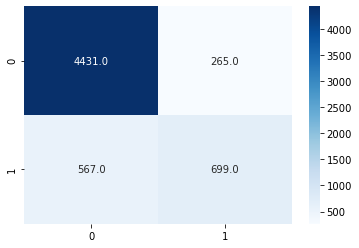

In [144]:
#Plot a heatmap of the confusion matrix
sns.heatmap(cf_matrix_new, annot=True, fmt = '.1f', cmap = 'Blues')

In [149]:
#Finally, the model is saved
import joblib
joblib.dump(model, 'model')

['model']